# Beckmann and Hense Phytoplankton model with detritus

In [91]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp,odeint
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, ticker

In [130]:
class variables:
    n = 100
    
    def __init__(self,gamma,epsilon,Av,w,I_0,depth,kw,kc,kn,mu,alpha, tau, N_b, u, H_i):
         
         # gamma
        self.gamma = gamma
        
        
        # epsilon
        self.epsilon = epsilon
            
            
         # diffusivity
        self.Av = Av    # meters per second

         # verticle settling
        self.w = w   # meters per day

         #incident light
        self.I_0 = I_0  # umol photons m-2 s-1

         # depth
        self.depth = depth    # meters


         # background turbidity
        self.kw = kw  #m-1


         # specific light attenuation of phytoplankton
        self.kc = kc
     

         # H_N half saturation constatn for nutrient limiting
        self.kn = kn


         # m specific loss rate
        self.mu = mu
        
        # alpha = 
        self.alpha = alpha
        
        
        # tau
        self.tau = tau
        
        # w = 
        
        self.w = w
        
        # N-h
        self.N_b = N_b
        
        # u plankton sinking
        self.u = u
        
        
        # half saturation for light
        self.H_i = H_i
        
        # size of each depth grid
    def delta_z(self):
        grids = self.depth / self.n
        return grids

In [131]:
                  # gamma   epsilon    Av m/day    w m/day    I_0    depth     kw        kc       kn       mu     alpha     tau    N-h    u    H_i
param = variables( 1.5,     0.03,       10,         2.5,     200,    300,    0.045,    6e-10,    0.03,    0.5,   1e-9 ,    0.02,   50,  1.96,   30  )


# I0 - annual solar mean radiance
# kw - light penetration lenght scales
# kc - attenuation coefficient of phytoplankton
# mu - maximum specific growth rate
# alpha - initial slope of PI curve 
# kn - half saturation constant for nitrogen
# epsilon - phytoplankton mortality
# gamma  - zooplankton quadratic grazing parameter
# Av - verticle diffusivities 
# w - verticle remineralization length    m day-1
# N-h - Nutrients at bottom height -h mmols N m-3

In [132]:
param.__dict__

{'gamma': 1.5,
 'epsilon': 0.03,
 'Av': 10,
 'w': 2.5,
 'I_0': 200,
 'depth': 300,
 'kw': 0.045,
 'kc': 6e-10,
 'kn': 0.03,
 'mu': 0.5,
 'alpha': 1e-09,
 'tau': 0.02,
 'N_b': 50,
 'u': 1.96,
 'H_i': 30}

In [133]:
# depth_grid 
def depth_grid(param):
    z = np.arange((0.5 * param.delta_z()),(param.depth - 0.5* param.delta_z())+ param.delta_z(), param.delta_z())
    return z

z = depth_grid(param)
z

array([  1.5,   4.5,   7.5,  10.5,  13.5,  16.5,  19.5,  22.5,  25.5,
        28.5,  31.5,  34.5,  37.5,  40.5,  43.5,  46.5,  49.5,  52.5,
        55.5,  58.5,  61.5,  64.5,  67.5,  70.5,  73.5,  76.5,  79.5,
        82.5,  85.5,  88.5,  91.5,  94.5,  97.5, 100.5, 103.5, 106.5,
       109.5, 112.5, 115.5, 118.5, 121.5, 124.5, 127.5, 130.5, 133.5,
       136.5, 139.5, 142.5, 145.5, 148.5, 151.5, 154.5, 157.5, 160.5,
       163.5, 166.5, 169.5, 172.5, 175.5, 178.5, 181.5, 184.5, 187.5,
       190.5, 193.5, 196.5, 199.5, 202.5, 205.5, 208.5, 211.5, 214.5,
       217.5, 220.5, 223.5, 226.5, 229.5, 232.5, 235.5, 238.5, 241.5,
       244.5, 247.5, 250.5, 253.5, 256.5, 259.5, 262.5, 265.5, 268.5,
       271.5, 274.5, 277.5, 280.5, 283.5, 286.5, 289.5, 292.5, 295.5,
       298.5])

## Changing diffusivity

In [134]:
D_z = np.arange(1,13,1)
D_z


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [135]:
## diffusion of phytoplankton

# advection flux
j_a = np.zeros(param.n + 1)

# diffusion flux
j_d = np.zeros(param.n + 1)

# total flux
j = np.zeros(param.n + 1)


# dp/dt
dp_dt = np.zeros(param.n)



## diffusion of nutrients

j_an = np.zeros(param.n + 1)

j_dn = np.zeros(param.n +1)

j_n = np.zeros(param.n +1)



dN_dt = np.zeros(param.n)


# advection and diffusion of Detritus

j_a_det = np.zeros(param.n +1)

j_d_det = np.zeros(param.n + 1)

j_det = np.zeros(param.n + 1)


# dD_dt
dD_dt = np.zeros(param.n)
dD_dt

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Initial conditions
## Planktons p = 1000 cells m-3 , Nutrients N = 5 mmols m-3

In [136]:
y = np.ones(param.n*3)

p = y[0:param.n]
N = y[param.n:param.n*2]
det = y[param.n*2:]

for i in range(len(p)):
    p[i] = p[i] * 0.1
    N[i] = N[i] * 5
    det[i] = det[i] * 0

p[0] = 0
N[0] = 0
p[param.n-1]= 0
N[param.n-1] = 0
det[0] = 0
det[param.n-1] = 0

#p
#N
det

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## time steps

In [137]:
t = (0,500)
t

(0, 500)

In [138]:
def calc_light(p,det,param):
    
    n_zt = np.zeros(param.n)
    
    n_zt = np.cumsum(p+det) * param.delta_z() * param.kc
    
    I_zt = param.I_0 * (np.e**(-param.kw * z - n_zt)) #   param.I_in*(np.e**(- param.K_bg * z - p_temp))
    
    return I_zt

In [139]:
I_zt = calc_light(p,det,param)
I_zt

array([1.86945544e+02, 1.63337296e+02, 1.42710395e+02, 1.24688343e+02,
       1.08942189e+02, 9.51845240e+01, 8.31642332e+01, 7.26619138e+01,
       6.34858702e+01, 5.54686150e+01, 4.84638115e+01, 4.23436032e+01,
       3.69962799e+01, 3.23242384e+01, 2.82422014e+01, 2.46756608e+01,
       2.15595174e+01, 1.88368934e+01, 1.64580935e+01, 1.43796982e+01,
       1.25637711e+01, 1.09771667e+01, 9.59092523e+00, 8.37974398e+00,
       7.32151565e+00, 6.39692472e+00, 5.58909491e+00, 4.88328115e+00,
       4.26660045e+00, 3.72779670e+00, 3.25703529e+00, 2.84572356e+00,
       2.48635395e+00, 2.17236701e+00, 1.89803162e+00, 1.65834043e+00,
       1.44891842e+00, 1.26594308e+00, 1.10607461e+00, 9.66394986e-01,
       8.44354676e-01, 7.37726115e-01, 6.44563045e-01, 5.63164989e-01,
       4.92046211e-01, 4.29908604e-01, 3.75617988e-01, 3.28183413e-01,
       2.86739070e-01, 2.50528488e-01, 2.18890726e-01, 1.91248310e-01,
       1.67096692e-01, 1.45995038e-01, 1.27558188e-01, 1.11449618e-01,
      

In [140]:
def calc_sigma_n(N,param):
    
    sigma_n = np.zeros(param.n)
        
    sigma_n = N/(param.kn + N)
    
    return sigma_n

In [141]:
calc_sigma_n(N,param)

array([0.        , 0.99403579, 0.99403579, 0.99403579, 0.99403579,
       0.99403579, 0.99403579, 0.99403579, 0.99403579, 0.99403579,
       0.99403579, 0.99403579, 0.99403579, 0.99403579, 0.99403579,
       0.99403579, 0.99403579, 0.99403579, 0.99403579, 0.99403579,
       0.99403579, 0.99403579, 0.99403579, 0.99403579, 0.99403579,
       0.99403579, 0.99403579, 0.99403579, 0.99403579, 0.99403579,
       0.99403579, 0.99403579, 0.99403579, 0.99403579, 0.99403579,
       0.99403579, 0.99403579, 0.99403579, 0.99403579, 0.99403579,
       0.99403579, 0.99403579, 0.99403579, 0.99403579, 0.99403579,
       0.99403579, 0.99403579, 0.99403579, 0.99403579, 0.99403579,
       0.99403579, 0.99403579, 0.99403579, 0.99403579, 0.99403579,
       0.99403579, 0.99403579, 0.99403579, 0.99403579, 0.99403579,
       0.99403579, 0.99403579, 0.99403579, 0.99403579, 0.99403579,
       0.99403579, 0.99403579, 0.99403579, 0.99403579, 0.99403579,
       0.99403579, 0.99403579, 0.99403579, 0.99403579, 0.99403

In [142]:
def calc_sigma_l(I_zt,param):
    
    sigma_l = np.zeros(param.n)
    
    sigma_l = I_zt/(param.H_i + I_zt)
    
    #sigma_l = (param.alpha * I_zt)/(np.sqrt(param.mu**2 + (param.alpha**2 * I_zt**2)))
        
    return sigma_l
    
    
calc_sigma_l(I_zt,param)

array([8.61716450e-01, 8.44830767e-01, 8.26298816e-01, 8.06061663e-01,
       7.84082861e-01, 7.60353764e-01, 7.34898570e-01, 7.07778680e-01,
       6.79095890e-01, 6.48993961e-01, 6.17658135e-01, 5.85312334e-01,
       5.52213943e-01, 5.18646344e-01, 4.84909580e-01, 4.51309786e-01,
       4.18148162e-01, 3.85710313e-01, 3.54256756e-01, 3.24015231e-01,
       2.95175234e-01, 2.67884961e-01, 2.42250596e-01, 2.18337673e-01,
       1.96174124e-01, 1.75754539e-01, 1.57045155e-01, 1.39989158e-01,
       1.24511927e-01, 1.10525948e-01, 9.79352267e-02, 8.66390887e-02,
       7.65353340e-02, 6.75227598e-02, 5.95030955e-02, 5.23824182e-02,
       4.60721224e-02, 4.04895216e-02, 3.55581546e-02, 3.12078621e-02,
       2.73746909e-02, 2.40006731e-02, 2.10335205e-02, 1.84262654e-02,
       1.61368708e-02, 1.41278309e-02, 1.23657727e-02, 1.08210706e-02,
       9.46747911e-03, 8.28178878e-03, 7.24350632e-03, 6.33456120e-03,
       5.53903789e-03, 4.84293313e-03, 4.23393715e-03, 3.70123723e-03,
      

In [143]:
def diff_ode(t,y):
    
    dy = np.zeros(param.n*3)
    
    p = y[0:param.n]
    N = y[param.n:param.n*2]
    det = y[param.n*2:]

    
    
    # diffusion of phytoplanktons
    for i in range(1,param.n):  
    
        # advection flux
        j_a[i] = param.u * p[i-1]
        j_a[0] = 0
        j_a[param.n] = 0
        
        # diffusionn flux
        j_d[i] = - param.Av * (p[i] - p[i-1])/param.delta_z()
        j_d[0] = 0
        j_d[param.n] = 0
    
    # addition of all fluxes
    j  = j_a + j_d
        
 
    for i in range(1,param.n-1):
         
        dp_dt[i] = -(j[i+1] - j[i])/param.delta_z()
        
    
    
    # nutrient fluxes
    
    for i in range(1,param.n):
        # no advection of nutrients
        j_an[i] = 0 # param.u * N[i-1]
        j_an[0] = 0
        j_an[param.n] = 0
        
        j_dn[i] = - param.Av * (N[i] - N[i-1])/param.delta_z()
        j_dn[0] = 0
        j_dn[param.n-1] =  - param.Av * (param.N_b - N[param.n-1]/param.delta_z())
        
        
    j_n = j_an + j_dn
    
    
    for i in range(1,param.n-1):
        
        dN_dt[i] = -(j_n[i+1] - j_n[i])/param.delta_z()
    

    
    # detritus fluxes
    
    for i in range(1,param.n):
        
        # advection of detritus
        j_a_det[i] =  50 * det[i-1]
        j_a_det[0] = 0
        j_a_det[param.n] = 0
        
        # diffusion of detritus
        j_d_det[i] = - param.Av * (det[i] - det[i-1])/param.delta_z()
        j_d_det[0] = 0
        j_d_det[param.n-1] = 0 
    
    
    j_det = j_a_det + j_d_det
    
    
    for i in range(1,param.n-1):
        
        dD_dt[i] = -(j_det[i+1] - j_det[i])/param.delta_z()
    
    
    
    
    # change in light with time and depth
    I_zt = calc_light(p,det,param)
    
    
    # sigma n
    sigma_n = calc_sigma_n(N,param)
    
        
    # sigmal l
    sigma_l = calc_sigma_l(I_zt,param)
    
    
        
    # change in nutrients and phytoplankton 
    
    for i in range(1,param.n-1):
     
        dp_dt[i] =  (param.mu * sigma_l[i] * sigma_n[i] * p[i]) - (param.epsilon * p[i]) - (param.gamma * p[i]**2) + dp_dt[i]  
        
        dN_dt[i] =  - (param.mu * sigma_l[i] * sigma_n[i] * p[i]) + (param.tau * det[i]) + dN_dt[i] 
        
        dD_dt[i] =  (param.epsilon * p[i]) + (param.gamma*p[i]**2) - (param.tau*det[i]) + dD_dt[i]
        
    dy[0:param.n] = dp_dt
    dy[param.n:param.n*2] = dN_dt
    dy[param.n*2:] = dD_dt
    return dy

In [144]:
#diff_ode(t,y)
soln = solve_ivp(diff_ode,t,y)

In [145]:
omega = soln.y[0:param.n,:]
omega.shape

(100, 5169)

In [146]:
#soln

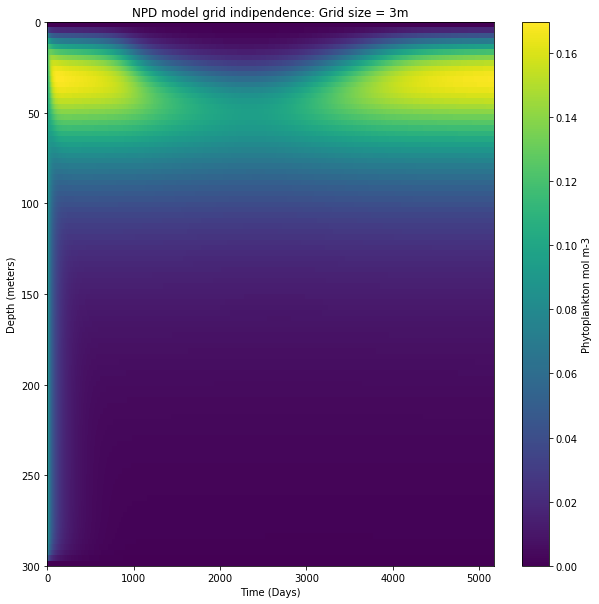

In [147]:
plt.title('NPD model grid indipendence: Grid size = 3m')
plt.xlabel('Time (Days)')
plt.ylabel('Depth (meters)')

scale_y = param.delta_z()

plt.imshow(omega,cmap = 'viridis', aspect = 'auto', extent=[0,omega.shape[1],param.depth,0]) 
cb = plt.colorbar()
cb.set_label('Phytoplankton mol m-3')
plt.savefig('/users/manasi/Documents/dtu/course_content/grid_indipenden_3m.png')

In [127]:
nuts = soln.y[param.n:param.n*2,:]
nuts.shape
#nuts

(50, 2277)

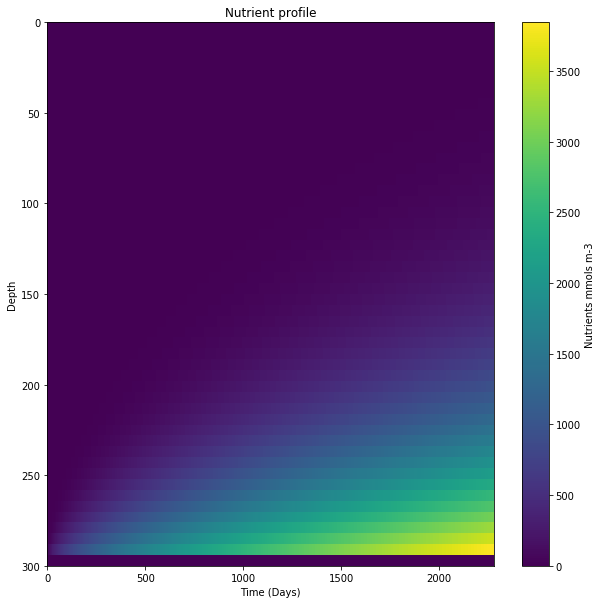

In [128]:
plt.title('Nutrient profile')
plt.xlabel('Time (Days)')
plt.ylabel('Depth')

scale_y = param.delta_z()

plt.imshow(nuts,cmap = 'viridis', aspect = 'auto', extent=[0,omega.shape[1],param.depth,0]) 
cb = plt.colorbar()
cb.set_label('Nutrients mmols m-3')

In [74]:
dets = soln.y[param.n*2:,:]
dets.shape[1]

2316

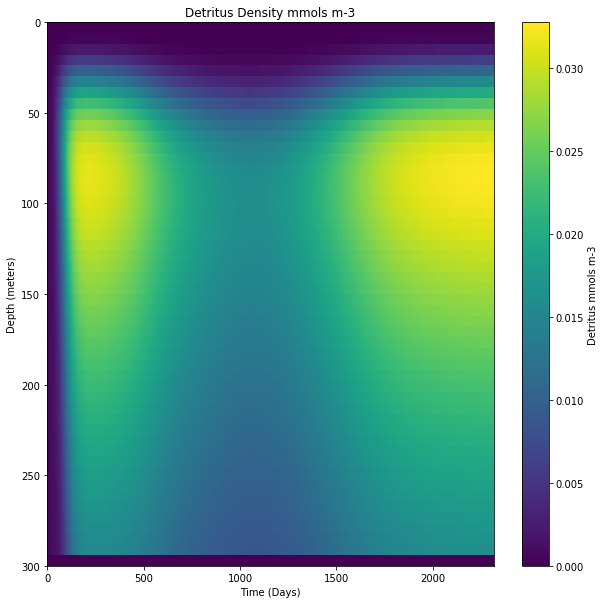

In [75]:
plt.title('Detritus Density mmols m-3')
plt.xlabel('Time (Days)')
plt.ylabel('Depth (meters)')

scale_y = param.delta_z()

plt.imshow(dets,cmap = 'viridis', aspect = 'auto', extent=[0,omega.shape[1],param.depth,0]) 
cb = plt.colorbar()
cb.set_label('Detritus mmols m-3')

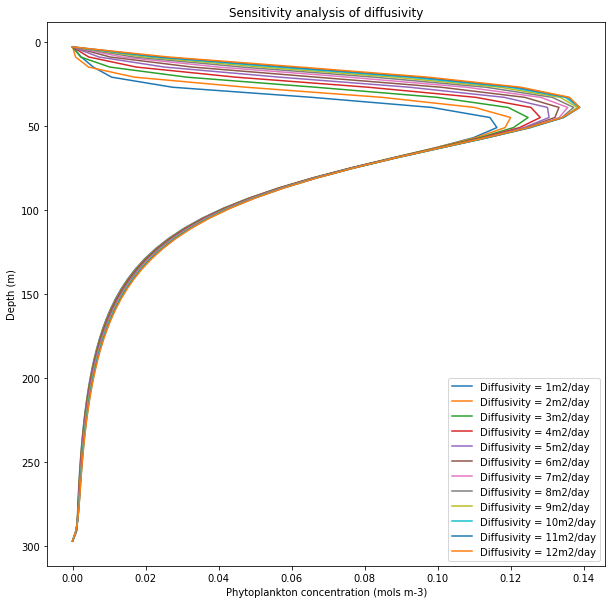

In [90]:
leg = []
for i in range(len(D_z)):
    param.Av = D_z[i]
    soln = solve_ivp(diff_ode,t,y)    
    omega = soln.y[0:param.n,:]
    
    diffs = str(D_z[i])
    
    pltname = 'Sensitivity analysis of diffusivity' 
    x = omega[:,500]
    y1 = z
    
    pltleg = 'Diffusivity = ' + diffs + 'm2/day'
    
    
    
    leg.append(pltleg)
    
    plt.plot(x,z)
    
    plt.title(pltname)
    plt.xlabel('Phytoplankton concentration (mols m-3)')
    plt.ylabel('Depth (m)')
    
    
    
    #scale_y = param.delta_z()

    #plt.imshow(omega,cmap = 'viridis', aspect = 'auto', extent=[0,omega.shape[1],param.depth,0]) 
    #cb = plt.colorbar()
    #cb.set_label('Phytoplankton umol m-3')
    
    #ppath = '/Users/manasi/Documents/dtu/course_content/'
    #fname = 'beckmann&hanse' + str(param.Av) + '.png'
    #fpath = ppath + fname
    #plt.savefig(fpath)
    #plt.close()

    
#leg
plt.legend(leg,loc = 'lower right')
plt.rcParams["figure.figsize"] = [10,10]
plt.gca().invert_yaxis()
#plt.show()    

plt.savefig('/users/manasi/Documents/dtu/course_content/sensitivity_d.png')
#plt.close()

In [ ]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

x_values = np.linspace(1, 365, 365)
for mu, sig in [(150,50)]:
    plt.plot(x_values, gaussian(x_values, mu, sig))

#plt.show()

In [ ]:
L = param.I_0 + (param.I_0*gaussian(x_values,210,40))
plt.plot(x_values,L)

In [ ]:
def calc_light(p,t,det,param):
    
    n_zt = np.zeros(param.n)
    
    
    L = param.I_0 + (param.I_0*gaussian(x_values,210,60))
    
    d =  
    
    if d <= 365:
        param.I_0 = L[d]       
    else:
        d = t - d
        param.I_0 = L[d]
        
    n_zt = np.cumsum(p+det) * param.delta_z() * param.kc 
    I_zt = param.I_0 * (np.e**(-param.kw * z - n_zt))       #   param.I_in*(np.e**(- param.K_bg * z - p_temp))
    
    return I_zt


calc_light(p,t,det,param)

In [ ]:
y.shape

In [ ]:
x = range(50)
y = range(50)
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
data = dets

z = np.transpose(data)
#z = data

#label axes
ax.set_xlabel('Depth (meters)')
ax.set_ylabel('Time')
ax.set_zlabel('Concentration (ø)')


surf = ax.plot_surface(x, y, z, shade = True,  alpha=1, cmap = cm.viridis)
ax.view_init(30,120)
plt.show()

plt.savefig('/Users/manasi/Documents/rectn_diffusn_3d.png')